<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python 2020** <br>
**PROFESORES:** Germán González y Mateo Dulce <br><br>


# Clase 5: Rutas

- Carreteras





In [55]:
# !pip3 install shapely
# !pip3 install pyproj
# !pip3 install folium
# !pip3 install pandas
# !pip3 install requests
# !pip3 install geopy
# !pip3 install geojson
# !pip3 install xlrd
# !pip3 install rtree
# !pip3 install networkx
# !pip3 install osmnx
# !pip3 install osmnx=='0.14.1'


import pandas as pd
import urllib, json
import geopandas as gpd
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import rtree
import folium
import geojson
from shapely.geometry import LineString, Point
import datetime
from functools import partial
import pyproj
from shapely.ops import transform
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import geopy

### Carreteras - OXMN

## Dirección Lugar

In [3]:
Informacion_carretera = ox.graph_from_address('Usaquen,Bogotá,Colombia', network_type='drive',dist=2000)

## Gráfico

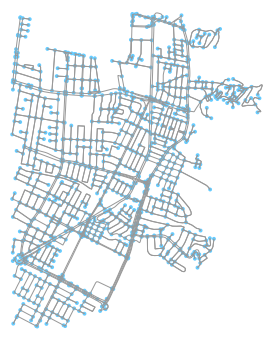

In [5]:
figura, ax = ox.plot_graph(Informacion_carretera)

In [35]:
figura.savefig('usaquen.png')

## Por nombre

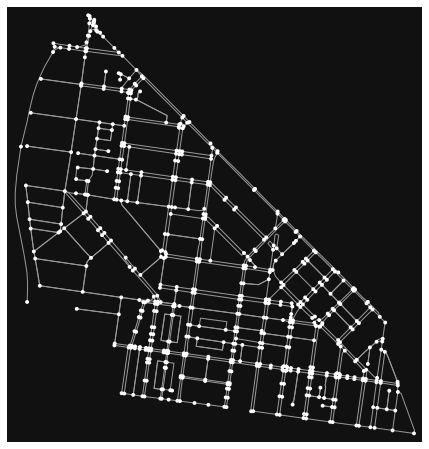

In [36]:
Informacion_carretera = ox.graph_from_place('North Melbourne,Victoria,Australia', network_type='drive')
figura, ax = ox.plot_graph(Informacion_carretera)

## Con polígonos

In [7]:
Localidades = pd.read_pickle('Localidades.gzip',compression='gzip')

In [8]:
Localidades

,Localidad,geometry
0,Ciudad bolivar,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
1,Suba,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
2,Rafael uribe uribe,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
3,Kennedy,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."
4,Usme,"POLYGON ((-74.05597 4.50832, -74.05611 4.50822..."
5,Los martires,"POLYGON ((-74.07283 4.61542, -74.07311 4.61480..."
6,Santa fe,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
7,Barrios unidos,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
8,Fontibon,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
9,Engativa,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."


In [9]:
#### ------ Filtramos Usaquen ------ ######
Usaquen = Localidades[Localidades['Localidad'] == 'Usaquen']
Poligono_usaquen = Usaquen['geometry'].iloc[0]

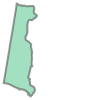

In [10]:
Poligono_usaquen

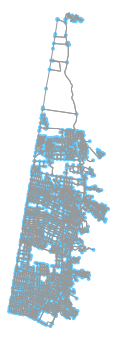

In [11]:
Informacion_carretera = ox.graph_from_polygon(Poligono_usaquen, network_type='drive')
figura, ax = ox.plot_graph(Informacion_carretera)

## Geo Pandas

In [12]:
Nodos_usaquen, Carreteras_usaquen = ox.graph_to_gdfs(Informacion_carretera, nodes=True, edges=True)
Carreteras_usaquen.to_crs(epsg=4326, inplace=True)

In [13]:
Nodos_usaquen

,y,x,osmid,highway,geometry
8177836034,4.735781,-74.028551,8177836034,NaN,POINT (-74.02855 4.73578)
8177836045,4.730421,-74.026247,8177836045,NaN,POINT (-74.02625 4.73042)
8177836046,4.730634,-74.026745,8177836046,NaN,POINT (-74.02675 4.73063)
532553749,4.762977,-74.031195,532553749,NaN,POINT (-74.03119 4.76298)
6489505814,4.758328,-74.029474,6489505814,NaN,POINT (-74.02947 4.75833)
...,...,...,...,...,...
310804428,4.737548,-74.044371,310804428,NaN,POINT (-74.04437 4.73755)
312410089,4.749405,-74.044027,312410089,NaN,POINT (-74.04403 4.74941)
312410090,4.749211,-74.043187,312410090,NaN,POINT (-74.04319 4.74921)
310665201,4.714582,-74.037936,310665201,traffic_signals,POINT (-74.03794 4.71458)


In [23]:
Carreteras_usaquen

,osmid,name,highway,oneway,length,lanes,maxspeed,geometry,access,bridge,junction,tunnel,u,v,key
0,183513093,Carrera 8A Bis,residential,False,30.723,NaN,NaN,"LINESTRING (-74.02855 4.73578, -74.02838 4.73600)",NaN,NaN,NaN,NaN,8177836034,1939019518,0
1,89067417,Carrera 7C,residential,False,96.372,2,NaN,"LINESTRING (-74.02625 4.73042, -74.02594 4.73123)",NaN,NaN,NaN,NaN,8177836045,551166731,0
2,582012495,Calle 155,residential,False,32.252,2,30,"LINESTRING (-74.02625 4.73042, -74.02651 4.73054)",NaN,NaN,NaN,NaN,8177836045,1916595900,0
3,582012495,Calle 155,residential,False,3.616,2,30,"LINESTRING (-74.02625 4.73042, -74.02622 4.73041)",NaN,NaN,NaN,NaN,8177836045,551166738,0
4,89067351,Carrera 7D,residential,False,94.720,2,NaN,"LINESTRING (-74.02675 4.73063, -74.02646 4.73144)",NaN,NaN,NaN,NaN,8177836046,551126297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,817088674,Carrera 11B,residential,False,75.632,2,NaN,"LINESTRING (-74.03794 4.71458, -74.03792 4.714...",NaN,NaN,NaN,NaN,310665201,310347162,0
8667,"[585254312, 28258305, 817088674]",Carrera 11B,residential,False,23.404,2,NaN,"LINESTRING (-74.03794 4.71458, -74.03795 4.714...",NaN,yes,NaN,NaN,310665201,479198221,0
8668,582012495,Calle 155,residential,False,10.178,2,30,"LINESTRING (-74.02538 4.73005, -74.02547 4.73009)",NaN,NaN,NaN,NaN,8177836022,551126259,0
8669,582012495,Calle 155,residential,False,29.620,2,30,"LINESTRING (-74.02538 4.73005, -74.02514 4.72995)",NaN,NaN,NaN,NaN,8177836022,551126155,0


## Carreteras

In [92]:
Carreteras_usaquen

osmid  oneway lanes  \
u          v          key                                         
254347526  254347527  0                  89438994    True     3   
254347527  475150473  0                  89438994    True     3   
           475150478  0                  39637704   False     2   
254347540  5935325521 0                 628655300    True     2   
254347543  476455721  0                  89480449    True     2   
...                                           ...     ...   ...   
8785290517 4109041160 0                 409009697   False   NaN   
           4109043447 0    [409010437, 409010151]   False   NaN   
           5113873152 0                 809625161   False   NaN   
8863150023 332603054  0                 957867322   False   NaN   
           326175956  0                 957867325    True     2   

                                        name       highway   length  \
u          v          key                                             
254347526  254347527  0    Avenida Carrera 7       primary   66.158   
254347527  475150473  0    Avenida Carrera 7       primary   65.912   
           475150478  0           Calle 120A   residential  207.334   
254347540  5935325521 0    Avenida Carrera 7       primary   11.002   
254347543  476455721  0            Calle 106     secondary   11.161   
...                                      ...           ...      ...   
8785290517 4109041160 0                  NaN   residential  242.257   
           4109043447 0            Calle 173   residential  207.345   
           5113873152 0                  NaN   residential  105.644   
8863150023 332603054  0                  NaN  primary_link   22.383   
           326175956  0           Carrera 10   residential   18.328   

                                                                    geometry  \
u          v          key                                                      
254347526  254347527  0    LINESTRING (-74.03081 4.69781, -74.03093 4.697...   
254347527  475150473  0    LINESTRING (-74.03119 4.69735, -74.03151 4.69685)   
           475150478  0    LINESTRING (-74.03119 4.69735, -74.03125 4.697...   
254347540  5935325521 0    LINESTRING (-74.03498 4.68791, -74.03500 4.68781)   
254347543  476455721  0    LINESTRING (-74.03571 4.68514, -74.03562 4.68509)   
...                                                                      ...   
8785290517 4109041160 0    LINESTRING (-74.04116 4.75328, -74.04115 4.753...   
           4109043447 0    LINESTRING (-74.04116 4.75328, -74.04129 4.753...   
           5113873152 0    LINESTRING (-74.04116 4.75328, -74.04105 4.753...   
8863150023 332603054  0    LINESTRING (-74.03504 4.71328, -74.03502 4.713...   
           326175956  0    LINESTRING (-74.03504 4.71328, -74.03503 4.713...   

                          maxspeed access bridge tunnel junction  
u          v          key                                         
254347526  254347527  0        NaN    NaN    NaN    NaN      NaN  
254347527  475150473  0        NaN    NaN    NaN    NaN      NaN  
           475150478  0         30    NaN    NaN    NaN      NaN  
254347540  5935325521 0        NaN    NaN    NaN    NaN      NaN  
254347543  476455721  0        NaN    NaN    NaN    NaN      NaN  
...                            ...    ...    ...    ...      ...  
8785290517 4109041160 0        NaN    NaN    NaN    NaN      NaN  
           4109043447 0        NaN    NaN    NaN    NaN      NaN  
           5113873152 0        NaN    NaN    NaN    NaN      NaN  
8863150023 332603054  0        NaN    NaN    NaN    NaN      NaN  
           326175956  0        NaN    NaN    NaN    NaN      NaN  

[8671 rows x 12 columns]

## Nodos

In [43]:
Nodos_usaquen.head()

,y,x,street_count,highway,geometry
osmid,,,,,
254347526,4.697813,-74.030815,3,NaN,POINT (-74.03081 4.69781)
254347527,4.697348,-74.031185,3,NaN,POINT (-74.03119 4.69735)
254347540,4.687908,-74.034982,3,traffic_signals,POINT (-74.03498 4.68791)
254347543,4.685141,-74.035708,4,traffic_signals,POINT (-74.03571 4.68514)
254530409,4.696943,-74.033164,3,NaN,POINT (-74.03316 4.69694)


/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


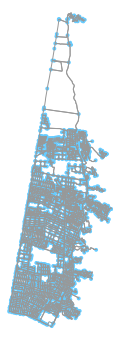

<Figure size 432x288 with 0 Axes>

In [25]:
### Proyectar el grafico de nodos a otro sistema 
Grafico_projectado = ox.project_graph(Informacion_carretera,to_crs={'init': 'epsg:4326'})
fig, ax = ox.plot_graph(Grafico_projectado)
plt.tight_layout()

In [26]:
Estadisticas = ox.basic_stats(Grafico_projectado)

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pyproj/crs/crs.py:292: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [27]:
Estadisticas

{'n': 3749,
 'm': 8671,
 'k_avg': 4.625766871165644,
 'intersection_count': 3119,
 'streets_per_node_avg': 2.8372899439850627,
 'streets_per_node_counts': {0: 0, 1: 630, 2: 4, 3: 2475, 4: 629, 5: 8, 6: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1680448119498533,
  2: 0.0010669511869831954,
  3: 0.6601760469458522,
  4: 0.1677780741531075,
  5: 0.002133902373966391,
  6: 0.0008002133902373967},
 'edge_length_total': 845192.587,
 'edge_length_avg': 97.47348483450583,
 'street_length_total': 523340.88900000125,
 'street_length_avg': 98.85547582168516,
 'street_segments_count': 5294,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0652011190408854,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

 Para poder extraer las estadísticas más avanzadas (y algunas de las que faltan más arriba) de la red de calles, se requiere tener información sobre el área de cobertura de la red. Calculemos el área del casco convexo de la red de calles y veamos qué podemos obtener. Como ciertas estadísticas se producen por separado para cada nodo, producen una gran cantidad de resultados.

In [38]:
#### -------- Figura convexa ------ ########
area = Carreteras_usaquen.unary_union.convex_hull.area

In [39]:
Carreteras_usaquen

,osmid,name,highway,oneway,length,lanes,maxspeed,geometry,access,bridge,junction,tunnel,u,v,key
0,183513093,Carrera 8A Bis,residential,False,30.723,NaN,NaN,"LINESTRING (-74.02855 4.73578, -74.02838 4.73600)",NaN,NaN,NaN,NaN,8177836034,1939019518,0
1,89067417,Carrera 7C,residential,False,96.372,2,NaN,"LINESTRING (-74.02625 4.73042, -74.02594 4.73123)",NaN,NaN,NaN,NaN,8177836045,551166731,0
2,582012495,Calle 155,residential,False,32.252,2,30,"LINESTRING (-74.02625 4.73042, -74.02651 4.73054)",NaN,NaN,NaN,NaN,8177836045,1916595900,0
3,582012495,Calle 155,residential,False,3.616,2,30,"LINESTRING (-74.02625 4.73042, -74.02622 4.73041)",NaN,NaN,NaN,NaN,8177836045,551166738,0
4,89067351,Carrera 7D,residential,False,94.720,2,NaN,"LINESTRING (-74.02675 4.73063, -74.02646 4.73144)",NaN,NaN,NaN,NaN,8177836046,551126297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,817088674,Carrera 11B,residential,False,75.632,2,NaN,"LINESTRING (-74.03794 4.71458, -74.03792 4.714...",NaN,NaN,NaN,NaN,310665201,310347162,0
8667,"[585254312, 28258305, 817088674]",Carrera 11B,residential,False,23.404,2,NaN,"LINESTRING (-74.03794 4.71458, -74.03795 4.714...",NaN,yes,NaN,NaN,310665201,479198221,0
8668,582012495,Calle 155,residential,False,10.178,2,30,"LINESTRING (-74.02538 4.73005, -74.02547 4.73009)",NaN,NaN,NaN,NaN,8177836022,551126259,0
8669,582012495,Calle 155,residential,False,29.620,2,30,"LINESTRING (-74.02538 4.73005, -74.02514 4.72995)",NaN,NaN,NaN,NaN,8177836022,551126155,0


In [40]:
stats = ox.basic_stats(Grafico_projectado, area=area)


/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pyproj/crs/crs.py:292: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [41]:
stats

{'n': 3749,
 'm': 8671,
 'k_avg': 4.625766871165644,
 'intersection_count': 3119,
 'streets_per_node_avg': 2.8372899439850627,
 'streets_per_node_counts': {0: 0, 1: 630, 2: 4, 3: 2475, 4: 629, 5: 8, 6: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1680448119498533,
  2: 0.0010669511869831954,
  3: 0.6601760469458522,
  4: 0.1677780741531075,
  5: 0.002133902373966391,
  6: 0.0008002133902373967},
 'edge_length_total': 845192.587,
 'edge_length_avg': 97.47348483450583,
 'street_length_total': 523340.88900000125,
 'street_length_avg': 98.85547582168516,
 'street_segments_count': 5294,
 'node_density_km': 938034536301.4355,
 'intersection_density_km': 780402699046.193,
 'edge_density_km': 211475016386224.53,
 'street_density_km': 130944739434701.84,
 'circuity_avg': 1.0652011190408854,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

Ahora calculemos el camino más corto entre dos puntos. Primero necesitamos especificar las ubicaciones de origen y destino para nuestra ruta. Usemos el centroide de nuestra red como la ubicación de origen y el punto más alejado de Oriente en nuestra red como la ubicación de destino.

Primero determinemos el centroide de nuestra red. Podemos aprovechar el atributo de límites para descubrir los cuadros delimitadores para cada característica en nuestros datos. Luego hacemos una unión unaria de esas características y hacemos una geometría de cuadro delimitador de esos valores que nos permite determinar el centroide de nuestros datos.

## Por dirección

In [90]:
Direccion = 'Carrera 112 # 7 - 59'
busqueda = Direccion + ', Bogotá, Colombia'
api_here = '5ELMuTthvjz1Blo6MzU2yhUqD7Jig9tBX4bDrz247-Y'
#### ---- El motor de busqueda solo se tiene que definir una vez --- ### 
motor_busqueda = geopy.geocoders.Here(app_id=None, app_code=None, apikey=api_here)
Resultado_busqueda = motor_busqueda.geocode(busqueda,timeout = 10000)

In [106]:
Origen = (4.696971,-74.030345) 
Destino = (4.686538,-74.030345)

In [107]:
Origen

(4.696971, -74.030345)

In [108]:
ox.get_nearest_node(Grafico_projectado, Origen, method='euclidean')

268627784

In [109]:
Nodos_usaquen.loc[Pos_cercano_origen]

y                                        4.70442
x                                       -74.0541
osmid                                  368396876
highway                                      NaN
geometry    POINT (-74.05414039999999 4.7044185)
Name: 368396876, dtype: object

In [110]:
######## --------------- Nodos cercanos ---------- ########## 
Pos_cercano_origen = ox.get_nearest_node(Grafico_projectado, Origen, method='euclidean')
Nodo_cercano_origen = Nodos_usaquen.loc[Pos_cercano_origen]

###### ----------- Vecino cercano -------- #########
Pos_destino_origen = ox.get_nearest_node(Grafico_projectado, Destino, method='euclidean')
Nodo_destino_origen = Nodos_usaquen.loc[Pos_destino_origen]

In [111]:
Nodo_cercano_origen

y                                 4.69707
x                                -74.0303
osmid                           268627784
highway                               NaN
geometry    POINT (-74.0303351 4.6970692)
Name: 268627784, dtype: object

In [112]:
Nodo_destino_origen

y                                 4.68657
x                                -74.0302
osmid                           519033787
highway                               NaN
geometry    POINT (-74.0302035 4.6865744)
Name: 519033787, dtype: object

## Se consolida un Geodataframe con los puntos de análisis

In [113]:
Nodos_interes = gpd.GeoDataFrame([Nodo_cercano_origen, Nodo_destino_origen], geometry='geometry', crs=Nodos_usaquen.crs)

In [114]:
Nodos_interes

,y,x,osmid,highway,geometry
268627784,4.697069,-74.030335,268627784,NaN,POINT (-74.03034 4.69707)
519033787,4.686574,-74.030203,519033787,NaN,POINT (-74.03020 4.68657)


In [116]:
Ruta_corta = nx.shortest_path(G=Grafico_projectado, source=Pos_cercano_origen, target=Pos_destino_origen, weight='length',method='dijkstra')

In [117]:
Ruta_corta

[268627784,
 262391190,
 268629564,
 483413842,
 268627729,
 268627731,
 268627732,
 268627808,
 268628369,
 268628322,
 475150468,
 476344216,
 2010133051,
 3545999051,
 3545996887,
 826233761,
 5686482230,
 254347540,
 5935325521,
 834679228,
 476509087,
 476509146,
 476509091,
 476509092,
 519033824,
 519033784,
 519033787]

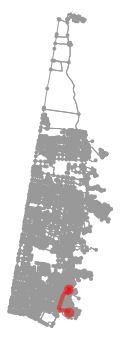

<Figure size 432x288 with 0 Axes>

In [118]:
fig, ax = ox.plot_graph_route(Grafico_projectado, Ruta_corta)

plt.tight_layout()

### Estructura de la ruta

In [119]:
Puntos_ruta = Nodos_usaquen.loc[Ruta_corta]

In [121]:
Ruta = LineString(list(Puntos_ruta.geometry.values))

## Distancia ruta 

In [123]:
####### -------- Convertir a un sistema en donde la unidad es metros ------- #######
A_metros = partial(
    pyproj.transform,
    pyproj.Proj('EPSG:4326'),
    pyproj.Proj('EPSG:3857'))


In [124]:
### ----- Pasar los puntos originales a lat,lon ---- #######
Puntos_originales = Puntos_ruta['geometry'].apply(lambda x: Point(x.coords[0][1],x.coords[0][0]))
Puntos_metros = list(map(lambda x: transform(A_metros, x),list(Puntos_originales) ))

In [125]:
Puntos_metros[0].coords[0]

(-8241019.206587407, 523462.0110071452)

In [126]:
Ruta_metros = LineString(Puntos_metros)

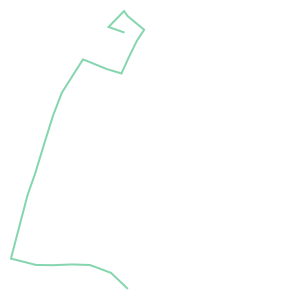

In [127]:
Ruta_metros

In [129]:
Ruta_metros.length/1000

2.2665200679679165

# HERE

## Mapa

In [131]:
mapa = folium.Map(location=[Origen[0],Origen[1]],zoom_start=15,tiles='cartodbpositron')

### ---------- Punto inicial --------- #####
folium.Marker([Origen[0],Origen[1]],icon=folium.Icon(color='red'),popup='Inicio').add_to(mapa)
### ---------- Punto final --------- #####
folium.Marker([Destino[0],Destino[1]],icon=folium.Icon(color='green'),popup='Final').add_to(mapa)

###### ---------- Ruta ----------- ########

Ruta_geojson = json.loads(json.dumps(geojson.Feature(geometry=Ruta)) )
folium.GeoJson(Ruta_geojson,
style_function=lambda feature: {
    'fillColor': '#415464',
    'color': '#415464',
    'weight': 2,'dashArray': '5, 5',
    'fillOpacity':0.2,
},highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Ruta',
name='Ruta').add_to(mapa)

In [133]:
mapa

## Parametros

In [134]:
API_key = '5ELMuTthvjz1Blo6MzU2yhUqD7Jig9tBX4bDrz247-Y'
#### ------- Latitude, longitude ----- ###### 
Inicio = str(Origen[0])+','+str(Origen[1])
Final = str(Destino[0])+','+str(Destino[1])
##### ----------- Modo -------- ########
# ---- car, pedestrian	, publicTransport, truck, bicycle
Modo = 'pedestrian'
# --- Walking speed --- ### 
Velocidad_caminar = 1.4
Velocidad_caminar = '&walkSpeed=' + str(Velocidad_caminar)

### ------ Analisis tiempo ---- #### 
Tiempo = '2020-07-01 '
Tiempo = datetime.datetime.strptime('2020-06-12 14:00:00','%Y-%m-%d %H:%M:%S')
Tiempo=Tiempo.strftime('%Y-%m-%dT%H:%M:%S')
Tiempo = '&departure='+str(Tiempo)

##### -------- Tipo de ruta ----- ####### 
## Fastest: Más rapida 
## shortest: Más Corta 
## balanced: Balanceada
Tipo_ruta = 'fastest'


## Solicitud

In [137]:
####### ------- Solicitud -------- #####
built_url = 'https://route.ls.hereapi.com/routing/7.2/calculateroute.json?apikey='+API_key+'&waypoint0=geo!'+Inicio+'&waypoint1=geo!'+Final+'&mode='+Tipo_ruta+';'+Modo+';traffic:enabled&legattributes=li&c&returnelevation=true&metricSystem=imperial' + str(Velocidad_caminar) +  str(Tiempo)
html_data = pd.read_json(built_url)
Datos_ruta = pd.DataFrame(pd.DataFrame(pd.DataFrame(html_data.T['route'].iloc[0])['leg'].iloc[0])['link'].iloc[0])
Datos_ruta = pd.DataFrame(pd.concat([pd.DataFrame(x)[0] for x in Datos_ruta['shape']]))[0].reset_index(drop=True)
Latitudes = pd.DataFrame({'latitude': Datos_ruta.apply(lambda x: float(x.split(',')[0])),'longitude': Datos_ruta.apply(lambda x: float(x.split(',')[1]))})
Ruta_here  = LineString(list(Latitudes.apply(lambda x: (x['longitude'],x['latitude']),axis=1)))

## Mapa

In [140]:
mapa = folium.Map(location=[Origen[0],Origen[1]],zoom_start=15,tiles='cartodbpositron')

### ---------- Punto inicial --------- #####
folium.Marker([Origen[0],Origen[1]],icon=folium.Icon(color='red'),popup='Inicio').add_to(mapa)
### ---------- Punto final --------- #####
folium.Marker([Destino[0],Destino[1]],icon=folium.Icon(color='green'),popup='Final').add_to(mapa)

###### ---------- Ruta ----------- ########

Ruta_geojson = json.loads(json.dumps(geojson.Feature(geometry=Ruta)) )
folium.GeoJson(Ruta_geojson,
style_function=lambda feature: {
    'fillColor': 'red',
    'color': 'red',
    'weight': 2,'dashArray': '5, 5',
    'fillOpacity':0.2,
},highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Ruta',
name='Ruta').add_to(mapa)

Ruta_geojson_here = json.loads(json.dumps(geojson.Feature(geometry=Ruta_here)) )
folium.GeoJson(Ruta_geojson_here,
style_function=lambda feature: {
    'fillColor': 'green',
    'color': 'green',
    'weight': 2,'dashArray': '5, 5',
    'fillOpacity':0.2,
},highlight_function=lambda x: {'weight':10,'fillColor':'#fec821','color': '#fec821'},tooltip='Ruta',
name='Ruta').add_to(mapa)


In [141]:
mapa